## Generate a True Embedding and Noisy Samples:

In [60]:
# Imports:
import os
import sys

sys.path.append(f"{os.getcwd()}/..")  # hacky way to import library that exists in parent directory
import numpy as np
from BuildYourOwnEmbedding import functional, parameters, responses

In [61]:
# define stimulus input:
x = np.linspace(0, 1, 100)

# define true response parameters:
trueParams = {
    "mean": parameters.ConstantParameter(0.5),
    "std": parameters.LogRangeParameter(minValue=0.1, maxValue=1, numSamples=10)
}

# Generate true response:
responseManager = responses.ResponseManager(responses.GaussianResponse, **trueParams)
trueResponse = responseManager.generate_responses(x, noiseLevel=0)  # generate with no noise for the true embedding

# Generate noisy responses:
numSamples = 10
noiseLevel = 0.5
noisyResponses = responseManager.generate_responses(x, noiseLevel=noiseLevel, numSamples=numSamples)

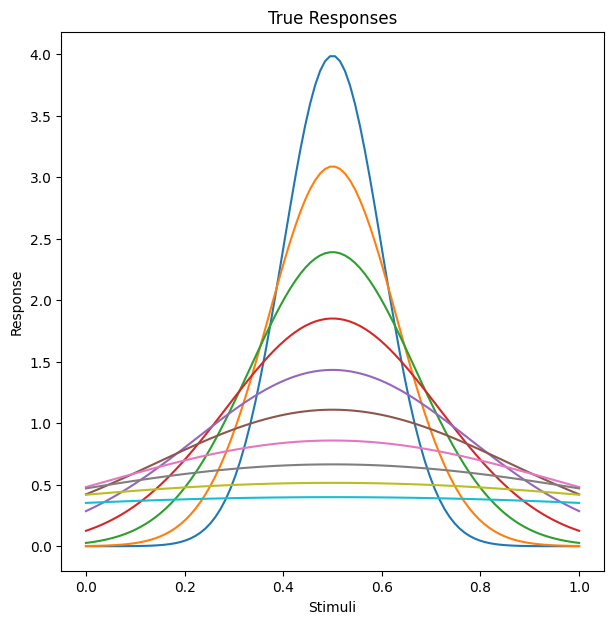

In [62]:
# Plot true responses:
trueResponse.plot_responses(title="True Responses")

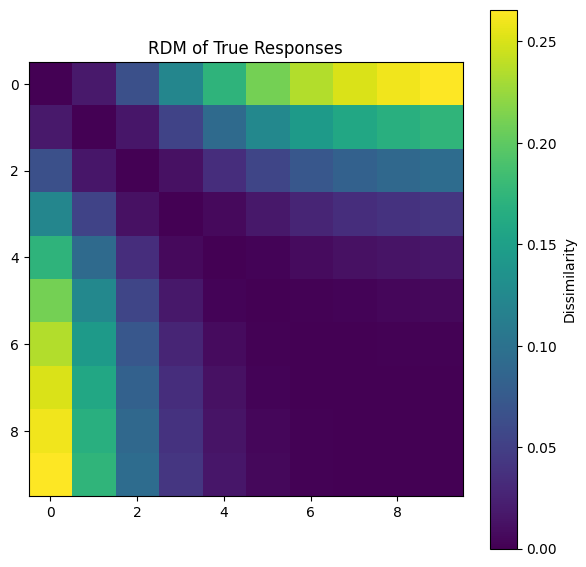

In [63]:
# RDM of True Responses:
trueResponse.plot_rdm(dissimilarityMetric=functional.inverse_correlation, title="RDM of True Responses")

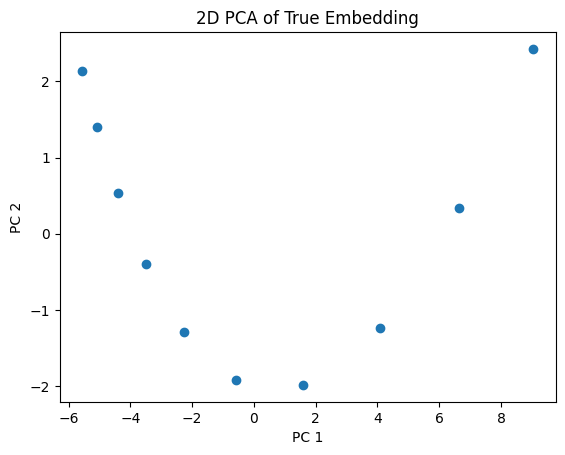

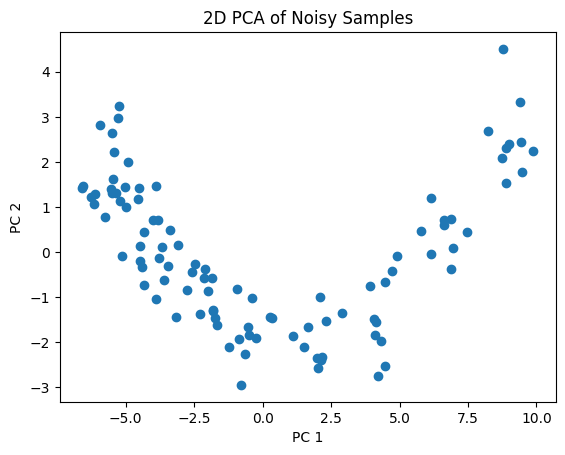

In [64]:
# Plot true response PCA:
trueResponse.plot_2D_PCA(title="2D PCA of True Embedding")

# Plot noisy response PCA:
noisyResponses.plot_2D_PCA(title="2D PCA of Noisy Samples")

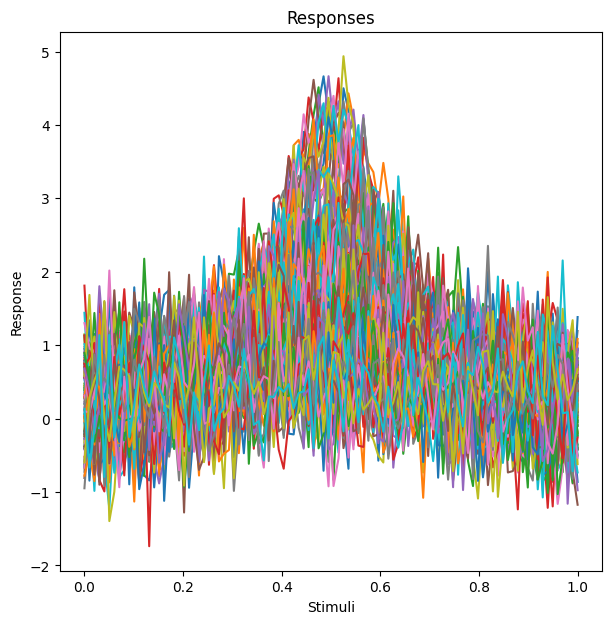

In [65]:
noisyResponses.plot_responses()

## Estimate Accuracy of Samples to Approximate True Embedding:

In [66]:
# Extra imports:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# define stimulus input:
x = np.linspace(0, 1, 100)

# define true response parameters:
trueParams = {
    "mean": parameters.ConstantParameter(0.5),
    "std": parameters.ConstantParameter(0.5)
}

# Generate true response:
responseManager = responses.ResponseManager(responses.GaussianResponse, **trueParams)
trueResponse = responseManager.generate_responses(x, noiseLevel=0)  # generate with no noise for the true embedding

# Generate noisy responses:
numSamples = 50
noiseLevel = 0.5
noisyResponses = responseManager.generate_responses(x, noiseLevel=noiseLevel, numSamples=numSamples)



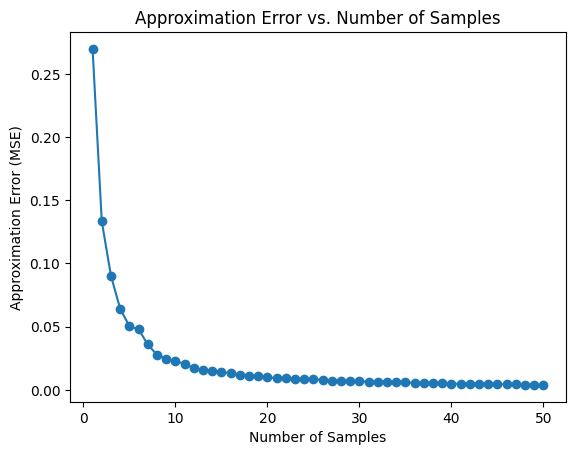

In [67]:
dissimilarityMetric = functional.inverse_correlation

# define a function to compute the mean response of a subset of noisy responses
def compute_mean_response(responseSet):
    meanResponses = np.mean([r.response for r in responseSet.responses], axis=0)
    return meanResponses


# define a function to estimate the approximation accuracy:
def estimate_approx_accuracy(trueResponse, noisyResponses):
    meanNoisyResponse = compute_mean_response(noisyResponses)
    return mean_squared_error(trueResponse.responses[0].response, meanNoisyResponse)

# Compute accuracy for increasing number of noisy samples
accuracies = []
sampleSizes = range(1, numSamples + 1)
for sample_size in sampleSizes:
    noisy_subset = responses.ResponseSet(noisyResponses.responses[:sample_size])
    accuracy = estimate_approx_accuracy(trueResponse, noisy_subset)
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of samples
plt.plot(sampleSizes, accuracies, marker='o')
plt.xlabel('Number of Samples')
plt.ylabel('Approximation Error (MSE)')
plt.title('Approximation Error vs. Number of Samples')
plt.show()